<a href="https://colab.research.google.com/github/DrDavidL/learning-dhds/blob/main/Part_5_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



- David Liebovitz, MD
- Updated by Jay Manadan
- Center for Education in Data Science and Digital Health - Institute for Artificial Intelligence in Medicine    
- Feinberg School of Medicine - Northwestern University    

[Part 1](https://drive.google.com/file/d/1N9U5NybETiu6JdUBoiFvuLiZZ6UuG0Nx/view?usp=sharing), [Part 2](https://drive.google.com/file/d/1JGePTrMJfnjH4WWpu_F77Oy_rLRR2pCW/view?usp=sharing), [Part 3](https://drive.google.com/file/d/1UrGbYapImkuFA4RTp1rYC1zLCaCgaAxQ/view?usp=sharing),
[Part 4](https://drive.google.com/file/d/1h7NnkPIihE_JuztP7uEcEK3T5JMcDHk4/view?usp=sharing), [Part 5](https://drive.google.com/file/d/1qxjFy2fPc72tkyJxupQ6EruvFR94txaf/view?usp=sharing), [Part 6](https://drive.google.com/file/d/1bzYpdEFhFlr1_uqMIwNKesJ7XAWRSB5O/view?usp=sharing)


# Part 5: Introduction to Neural Networks for Medical Prediction

Welcome! You'll soon learn how oddly powerful neural network models are. They are even referred to as "deep learning" when they have multiple layers and can be used to generate highly accurate predictions!

To get the big picture, this notebook will help you:

1.  **Prepare your data:** You'll retrieve and transform our example medical dataset for use in a neural network. (The programming code can be modified for other data sets!)
2.  **Build a neural network:** Create a simple model using just a few lines of Python. (Don't worry - no coding knowledge required.)
3.  **Evaluate model performance:** We’ll assess how well your model predicts diabetes, and how changing thresholds impacts accuracy.
4. **Reflect:** You’ll review the key ideas and tools behind your model.

---

## **What are Neural Networks?**

Neural networks are computer models inspired by how the human brain works. They consist of layers of "neurons" that pass information and learn from patterns in the data.

We'll focus on a feedforward neural network (FNN)—ideal for binary classification tasks like predicting whether someone has diabetes or not.

##**Why Use Neural Networks?**##
Neural networks are great at detecting complex, hidden relationships in data—often outperforming traditional models. In healthcare, they can help with:

- Diagnosing conditions

- Predicting disease risk

- Personalizing treatments
---

There are different types of neural networks suitable for different projects. For example, here is a contrast between the FNN we'll assemble below and a Recurrent Neural Network (RNN).

First, our slightly simpler **FNN**:

- **Processing**: Each row of data in a batch is handled on its own. The network performs matrix operations followed by activation functions—same steps for each row.   
- **No Time Dependence:** The model doesn’t track the order of the data. You can shuffle your input rows without affecting the prediction for any single row.
- **Example Use Case:** Predicting diabetes based on lab results for individual patients. There’s no benefit in knowing the order of patients—each case is independent.



Now, for an **RNN**:

- **Processing:** Each row in a sequence is processed with information from previous rows. The model “remembers” what came before by carrying over a hidden state that affects how it reads the current input.
  - **At each time step** ( t ): The RNN uses the current input ( xₜ ) and the hidden state from the prior step ( hₜ₋₁ ). This creates a memory-like system where earlier inputs influence later outputs.
  
- **Temporal Dependence:** Order matters. If you shuffle the rows, the model's understanding of the sequence changes—and so will its predictions.
- **Example Use Cases:** Predicting the next word in a sentence (this may remind you of ChatGPT—but it actually uses a transformer, which reads all input at once!). More relevant to healthcare:      
    - **Vital Sign Monitoring:** Observing patterns in a patient’s heart rate, blood pressure, or breathing over time in an ICU to forecast conditions like sepsis or respiratory failure.

Now, back to our illustrative (and useful!) FNN. Even though different neural networks serve different purposes, they all rely on the same fundamental components. So, by building a feedforward neural network here, you're learning the core concepts that power all deep learning models—including the most advanced ones.

---


**Before We Begin: A Little Jargon**

Let's quickly cover some core concepts, so you're ready to dive in:

*   **Neurons/Nodes:** The building blocks of a neural network. They take in input, apply some math, and send the result forward.
*   **Layers:** Neurons are arranged in layers. We’ll have an *input layer* (for our features, like glucose values or BMI, the ingredients used to help our prediction), one or more *hidden layers* (where the model learns patterns), and an *output layer* (providing our prediction).
*   **Weights:** These are the model's internal settings that determine how strongly each input affects the next layer. They get adjusted during training.
*   **Activation Functions:** These functions add non-linearity so the model can learn more complex relationships. (We’ll explain types like ReLU and Sigmoid soon.)
*   **Training:** This is the process where the model adjusts its weights using examples with known answers, gradually learning how to make good predictions.
*   **Classification Threshold:** A cut-off point to turn a probability into a final prediction. For example, if the model says there’s a 0.7 chance of diabetes, and your threshold is 0.6, the final prediction will be “diabetes.”

Don't worry if these concepts seem unfamiliar now – we'll explore them more thoroughly as we progress! By the end of this notebook, you'll not only be able to build a neural network but also understand the underlying principles. Let's get started!

## **A Few Additional Terms and Requirements for Neural Networks**

Now that you have a general understanding, let's get a bit more specific about how neural networks work. These are the key concepts that underpin the models we'll be building:

1.  **Numerical Data is King!**
    *  Neural networks operate on numbers. If your data contains text or categories (like "Male/Female"), we have to convert these to numbers using encoding. We’ll use binary encoding for two-category columns and one-hot encoding for columns with more.

2.  **The Architecture: Layers**
    *   Think of layers as different stages in a pipeline.
        *   **Input Layer:**  Where features like blood pressure or BMI are fed into the network.
        *   **Hidden Layers:** These are the workhorses! These layers do the actual learning—spotting patterns and relationships between inputs. *Many* hidden layers are often called **deep learning** models.
        *   **Output Layer:** Produces the model’s final prediction. In our case, the output is the probability of diabetes.
3.  **The Brain of the Operation: Weights and Biases**
    *   **Weights:** Determine how strongly a feature influences a prediction.
    *   **Biases:**  Act like adjustable baselines to shift a neuron’s output up or down.

4.  **Math Under the Hood: Matrix Operations**
    *   Data flows through the network using mathematical operations like dot products and sums. Don’t worry—TensorFlow and Keras handle all of that for you automatically.

5.  **Adding Non-Linearity: Activation Functions**
    *   Activation functions introduce non-linearity to the model, allowing it to learn complex patterns and relationships in the data. They are applied to the outputs of matrix operations.
    *   Examples include ReLU, Sigmoid, Softmax, and Tanh. We'll see examples below and use a few of them in our code!

6.  **Making a Prediction: Forward Propagation**
    *   This is when data moves from the input layer through the hidden layers to the output. It happens both during training and when the model is used to make real predictions.



7.  **Measuring Our Error: Loss Function**
    * The loss function measures how far the model’s predictions are from the true answers.

    * A higher loss = bigger mistakes.

 * We’ll use binary crossentropy, great for yes/no problems like predicting diabetes.

8.  **Learning by Correcting: Backward Propagation**
    *  This is how the model learns: It looks at the loss. It calculates how each weight/bias affected the loss (using gradients). It adjusts the weights and biases to do better next time. This process repeats for every training example until the model gets good!



9.  **Controlling the Pace: Learning Rate**
    *   This controls how big the adjustments are during training. A small learning rate means slow and careful learning; a large one is faster but riskier.

10. **Organizing Training: Epochs and Batches**
    *   **Epoch:** One complete pass through the training dataset.
    *   **Batch:**  A smaller subset of the data used at one time to train the model.

11. **Optimization Algorithms**
    *  These decide how the weights and biases are updated. We’ll use Adam, a popular and efficient choice.

12. **Avoiding Overfitting: Regularization**
    *   Sometimes a model gets too good at the training data and performs poorly on new data. That’s called overfitting. To prevent this, we’ll use:
 *   Dropout: Temporarily turns off some neurons during training.
 *   L2 Regularization: Penalizes overly complex models.


13. **The Power of Curves: Non-linearity**
    *   Non-linearity is what makes neural networks powerful. Real-world data isn’t always straight or simple. Activation functions like ReLU or Sigmoid help us capture that complexity.

14. **Tuning the Model: Hyperparameters**
    *   These are parameters set *before* training, such as learning rate, the number of layers, or the number of neurons in a layer. They are crucial for the model to perform well, and often require some amount of tuning.

---

## **Frequently Asked Questions (FAQs)**

Let's solidify your understanding with some common questions:

1.  **What exactly is a Neural Network?**
    *   A computer model inspired by the brain, designed to learn from data and make predictions.

2.  **Why the Need for Numbers?**
    *   Neural networks only understand numbers. Categorical or text data must be converted to numeric form.

3.  **How does a Neural Network Work - In Simple Terms?**
   
 1.  Data goes through layers.
 2.  The model uses weights and biases to combine inputs.
 3. Activation functions help the model focus on what matters.
 4. The model produces a probability or prediction.


4.  **How Does the Network Learn?**
    *   **Forward Pass:** The network makes a prediction based on current "rules" (weights and biases).
    *   **Loss Function:** This is the "error" that quantifies how good (or bad!) the prediction was.
    *   **Backward Propagation:** Based on the error, the network adjusts the "rules" to improve for the next prediction.

5.  **What makes Neural Networks Powerful?**
    *   **Non-linearity:** Enables networks to handle complex relationships in data.
    *   **Layers:**  Layered structure means different levels of understanding are built up (like edges → shapes → objects in image models).

6.  **Why train for a long time?**
    *   Each epoch improves the model. Batches help train efficiently and stably.

7. **What Can Neural Networks be Used for?**
    *  Tons of tasks! Medical prediction, image recognition, speech understanding, language generation—anything with patterns in data.

---

## **Summary for Beginners**

*   Neural networks learn by mimicking the human brain.
*   They rely on numbers, math operations (matrix operations), and activation functions (non-linear functions) to work.
*   Training involves making guesses, evaluating errors, and making corrections repeatedly.
*   Through this process, neural networks can be trained to tackle complex tasks like predicting diseases or recognizing faces.

Before we get started with predicting diabetes, let's illustrate the components of a neural network and what's happening in the hidden layers.  If the image below is viewable, no need to run the code (which generates the image).

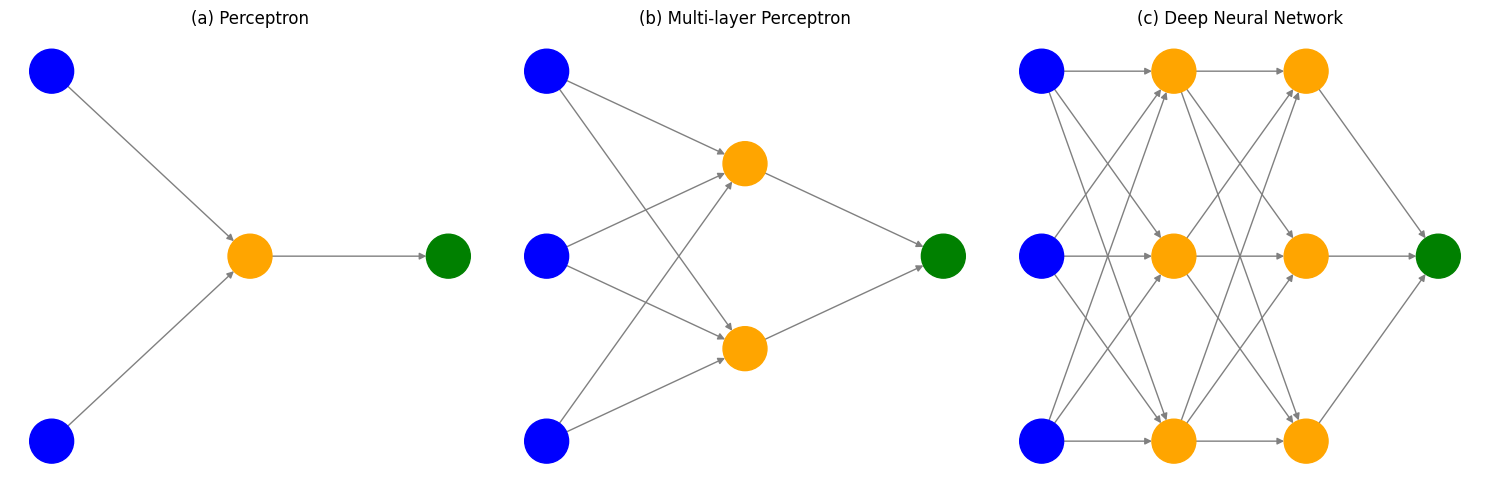

In [ ]:
# @title

import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_network_corrected(ax, layers, title, colors):
    G = nx.DiGraph()
    pos = {}
    node_sizes = []
    node_colors = []
    x_offset = 0

    # Ensure colors match the number of layers
    if len(colors) < len(layers):
        colors = colors[:len(layers)] + [colors[-1]] * (len(layers) - len(colors))

    for layer_idx, layer_nodes in enumerate(layers):
        y_offset = -(layer_nodes - 1) / 2
        for node_idx in range(layer_nodes):
            node_id = f"L{layer_idx}_N{node_idx}"
            pos[node_id] = (x_offset, y_offset + node_idx)
            G.add_node(node_id)
            node_sizes.append(1000)
            node_colors.append(colors[layer_idx])
        if layer_idx > 0:
            for prev_node_idx in range(layers[layer_idx - 1]):
                prev_node_id = f"L{layer_idx-1}_N{prev_node_idx}"
                for curr_node_idx in range(layer_nodes):
                    curr_node_id = f"L{layer_idx}_N{curr_node_idx}"
                    G.add_edge(prev_node_id, curr_node_id)
        x_offset += 1

    nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, with_labels=False, edge_color="gray")
    ax.set_title(title, fontsize=12)
    ax.axis("off")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Perceptron
draw_neural_network_corrected(
    axes[0],
    layers=[2, 1, 1],
    title="(a) Perceptron",
    colors=["blue", "orange", "green"]
)

# Multi-layer Perceptron
draw_neural_network_corrected(
    axes[1],
    layers=[3, 2, 1],
    title="(b) Multi-layer Perceptron",
    colors=["blue", "orange", "green"]
)

# Deep Neural Network
draw_neural_network_corrected(
    axes[2],
    layers=[3, 3, 3, 1],
    title="(c) Deep Neural Network",
    colors=["blue", "orange", "orange", "green"]
)

plt.tight_layout()
plt.show()


On the left side of these neural networks, the blue dots are inputs, say, blood pressure and glucose values. Then, these are processed in the single hidden orange neuron layer, which gives either 1 or 0 reflecting either diabetes or no diabetes in the green output. This is a perceptron. However, our algorithm can work much better with more inputs feeding more processing neurons (orange) before going to an output. This is a multilayer perceptron. But, say we had more processing layers of neurons, (columns of orange neurons), this becomes a deep neural network as seen in c above.

But, what's really happening to values getting in those orange neurons? At that point, values can be silenced, magnified or altered. Rather than just on or off like 1 or 0 that might help a linear algorithm, other outputs are possible with non-linear features such as:

	•	ReLU: Passes positives as-is, sets negatives to 0. (E.g., 2.5 → 2.5)
	•	Sigmoid: Squeezes values into a range of 0 to 1. (E.g., 2.5 → 0.924)
	•	Tanh: Squeezes values into a range of -1 to 1. (E.g., 2.5 → 0.986)
	•	Softmax: Turns a list into probabilities that add to 1. (E.g., [1, 2, 3, 4, 5] → [0.011, 0.031, 0.085, 0.231, 0.641])

Here is what the functions look like (no need to run code - it will just generate this image):

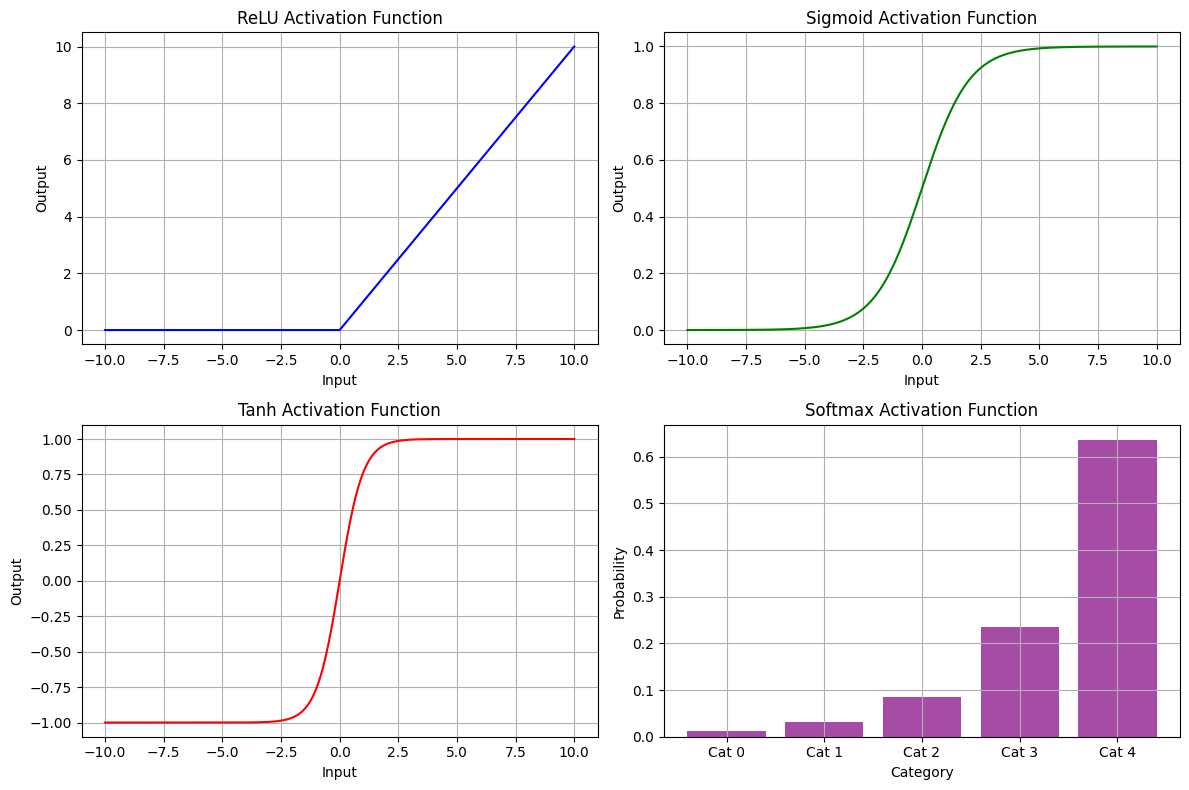

In [ ]:
# @title
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define Activation Functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def softmax(x):
    e_x = np.exp(x - np.max(x))  # Stabilizing softmax for numerical stability
    return e_x / e_x.sum(axis=0)

# Create a range of input values
x = np.linspace(-10, 10, 500)

# Compute activation function outputs
relu_values = relu(x)
sigmoid_values = sigmoid(x)
tanh_values = tanh(x)

# Plot the Activation Functions
plt.figure(figsize=(12, 8))

# ReLU Plot
plt.subplot(2, 2, 1)
plt.plot(x, relu_values, label='ReLU', color='blue')
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

# Sigmoid Plot
plt.subplot(2, 2, 2)
plt.plot(x, sigmoid_values, label='Sigmoid', color='green')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

# Tanh Plot
plt.subplot(2, 2, 3)
plt.plot(x, tanh_values, label='Tanh', color='red')
plt.title('Tanh Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

# Softmax Plot (Softmax applied to a sample vector)
x_softmax = np.array([1.0, 2.0, 3.0, 4.0, 5.0])  # Example vector
softmax_values = softmax(x_softmax)
plt.subplot(2, 2, 4)
plt.bar(range(len(x_softmax)), softmax_values, color='purple', alpha=0.7)
plt.title('Softmax Activation Function')
plt.xlabel('Category')
plt.ylabel('Probability')
plt.xticks(range(len(x_softmax)), labels=[f'Cat {i}' for i in range(len(x_softmax))])
plt.grid(True)

plt.tight_layout()
plt.show()

### Visualizing Activation Functions
We mentioned earlier that activation functions are key to how a network learns. Let’s break down the most commonly used ones:

1.  **ReLU (Rectified Linear Unit) Activation Function:**

    *   **Functionality:** Keeps positive numbers the same and turns negatives into zero. You can see this as the "elbow-shaped" blue line.
    *   **Analogy:** Think of it like a switch that only activates for a certain signal, and then provides a linear response with that signal.
    *   **Use case:** Often used in hidden layers due to its computational efficiency, but it should be used with care.

2.  **Sigmoid Activation Function:**

    *   **Functionality:** Converts numbers to a range between 0 and 1. The green S-curve demonstrates this.
    *   **Analogy:** This function can be seen as a "probability" generator, with output closer to 0 representing less likelihood and closer to 1 more likelihood.
    *   **Use case:** Perfect for binary classification where output = probability (like predicting "diabetes" or "no diabetes"). Also, a good choice when you would like to prevent very large values or very small values to propagate through the network, which may be unstable.

3.  **Tanh (Hyperbolic Tangent) Activation Function:**

    *   **Functionality:** Converts values to a range between -1 and 1.
    *   **Analogy:** Similar to Sigmoid but ranges from -1 to 1.
    *   **Use case:** Can be used as a replacement for sigmoid in hidden layers but sometimes makes the network harder to train than ReLU, but does not "turn off" like ReLU does.

4.  **Softmax Activation Function:**

    *   **Functionality:** The Softmax function takes a list of raw scores (called logits) and turns them into probabilities that add up to 1. Each number in the list is transformed in a way that reflects its relative size compared to the others. Bigger numbers get bigger probabilities, but everything stays between 0 and 1. In this example, there are 5 categories (Cat 0, Cat 1, Cat 2, Cat 3, Cat 4) and for this given input into the softmax, the output is 0.01, 0.03, 0.09, 0.23, and 0.64 respectively.
    *   **Analogy:** A softmax is like a team of people (different categories), where some are more or less likely to be involved, and those numbers always add to 1 (or 100%).
    *   **Use case:** Commonly used in the output layer for multi-class classification problems, where you need to predict one category out of multiple categories,for example, pedicting which disease a patient has from several options, or choosing which image class (cat, dog, bird) best matches a photo.

**Key Takeaways:**

*   **Non-linearity:** Activation functions add non-linearity.
*   **Output Range:** Each function has a different range and use case.
*   **Choice Matters:** The choice of activation function can significantly affect model performance.
*   **We'll Use These:**  These activation functions are the primary ones we'll use as we get to the coding sections of our notebook.

**Think of these functions as lenses that allow your network to focus on different aspects of the data. By using them together, the network can learn more complex and nuanced patterns.**

## **Understanding How Neural Networks Learn: The Magic of Backpropagation**

Forward propagation gets us a prediction. But how does the model get better?

Answer: Backpropagation — a feedback process that adjusts the model’s internal settings.
Here's a breakdown of what happens during this crucial step:

1.  **Adjusting the Importance: Weights and Biases**
    *   These are tweaked to increase or decrease the influence of inputs. It’s like adjusting the knobs on an old radio to get a clearer signal, or like adjusting the mix of ingredients in a recipe that isn't quite right.


2.  **Calculating the "Error Direction": Gradients**
    *   Gradients are calculated using calculus, specifically the **chain rule**. These tell us the "direction" to adjust weights and biases. They are essentially a mathematical way of saying "adjust this weight or bias to *make less errors*."

4.  **Updated Outputs: Activation Outputs**
    *   As weights and biases change, the outputs of the activation functions will also change. This means the network's interpretation of the data and predictions evolve.

5.  **Measuring Progress: Loss Value**
    *   The loss value quantifies the "error". As the model learns, you'll see the loss value decreasing. This means the network is making better predictions.

6.  **Advanced Learning: Optimizer States**
    *   Sophisticated optimizers (like Adam) don't just adjust weights; they also update internal states to improve the speed and efficiency of training. Think of it like the model is "learning how to learn."

7.  **Preventing Over-Commitment: Regularization Penalties**
    *   Regularization methods impose a penalty to control how complex the model becomes. This prevents "overfitting," where the model memorizes the training data and performs poorly on new, unseen data. It's like making sure the model doesn't get too caught up in the details of one patient's case and can generalize to others.

8.  **Adding Robustness: Dropout Configurations**
    *   Dropout randomly deactivates some neurons during training. This forces the network to learn more robust and generalized patterns, preventing any single neuron from becoming too important. Think of it like different physicians offering independent assessments and advice.

**In Summary**

Backpropagation is the heart of how neural networks learn. It's a feedback loop that constantly refines the network’s "understanding" of the data by making small adjustments to the model's parameters.  Through this iterative process, the network becomes increasingly accurate in its predictions.

Think of it this way: When a doctor makes a diagnosis, and it turns out not to be quite right, they will then update their understanding of the patient based on their new knowledge, to improve future diagnoses. Neural networks operate similarly, but with math!

**One More Analogy: Tuning a Music System**
Think of backpropagation as tuning a music system:  
	•	Weights and Biases: Like adjusting the volume knobs for each instrument.   
	•	Gradients: Tell you which knob to turn and how much.   
	•	Loss Value: Measures how far you are from the perfect sound.   
	•	Dropout: Occasionally mutes instruments to ensure no one sound dominates   

And - the output is a beautiful composition! (or much more accurate prediction!)

*After all this background material, we are ready to  create and train our own neural network to predict diabetes from our dataset!*

**Be sure to run the cell below which provides needed libraries for subsequent cells!**

In [ ]:
# First, we install required libraries
!pip install tensorflow pandas scikit-learn matplotlib seaborn --quiet

# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from IPython.display import display


Now, let's load our dataset we've been using! And, remind ourselves what's in it.

In [ ]:
# Now, we load our diabetes dataset
url = 'https://raw.githubusercontent.com/DrDavidL/auto_analyze/refs/heads/master/data/predictdm.csv'
diabetes_data = pd.read_csv(url)


# Let's remind ourselves about our dataset!
print("The first 5 rows of our dataset: \n")
display(diabetes_data.head())  # Display the first few rows of the data
print("\n\n Analysis of numerical variables in our dataset: \n")
display(diabetes_data.describe()) # Display descriptive stats
print("\n\n All the data types in our dataset: \n")
display(diabetes_data.info())  # Display the info



The first 5 rows of our dataset: 



,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,194,86,67,2.9,35,male,66,159,25.7,115,64,31,35,0.89,No diabetes
1,158,74,64,2.5,30,female,62,142,26.0,108,68,32,34,0.94,No diabetes
2,203,71,78,2.6,45,male,66,115,18.6,135,88,30,34,0.88,No diabetes
3,160,82,41,3.9,30,female,63,143,25.3,172,124,33,40,0.83,No diabetes
4,155,81,70,2.2,32,female,65,151,25.1,120,68,33,40,0.83,No diabetes




 Analysis of numerical variables in our dataset: 



,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,207.230769,107.338462,50.266667,4.524615,46.774359,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385
std,44.666005,53.798188,17.279069,1.736634,16.435911,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212
min,78.000000,48.000000,12.000000,1.500000,19.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000
25%,179.000000,81.000000,38.000000,3.200000,34.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000
50%,203.000000,90.000000,46.000000,4.200000,44.500000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000
75%,229.000000,107.750000,59.000000,5.400000,60.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000
max,443.000000,385.000000,120.000000,19.300000,92.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000




 All the data types in our dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cholesterol      390 non-null    int64  
 1   Glucose          390 non-null    int64  
 2   HDL Chol         390 non-null    int64  
 3   Chol/HDL ratio   390 non-null    float64
 4   Age              390 non-null    int64  
 5   Gender           390 non-null    object 
 6   Height           390 non-null    int64  
 7   Weight           390 non-null    int64  
 8   BMI              390 non-null    float64
 9   Systolic BP      390 non-null    int64  
 10  Diastolic BP     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  Waist/hip ratio  390 non-null    float64
 14  Diabetes         390 non-null    object 
dtypes: float64(3), int64(10), object(2)
memory usage: 45.8+ KB


None

Remember when we said neural networks use numbers?
The data types in our dataset include integers, floats (decimal numbers), and… uh oh, objects! These "object" types—like words such as “female” or “Diabetes”—can’t be directly used by neural networks. We need to convert them to numbers.

Since columns like "Gender" and "Diabetes" only have two categories, we use binary encoding. This means we assign 0 to the most common category and 1 to the less common one. For example, if "female" appears more than "male", we encode female as 0 and male as 1.

(If a column had more than two unique values—like different races or job types—we’d use one-hot encoding instead, which creates separate columns for each category and fills them with 1s and 0s to represent presence or absence.)

In [ ]:
import pickle
# Function to find and encode binary categorical features
def encode_binary_features(df, binary_columns):
    encoding_details = {}
    for col in binary_columns:
        value_counts = df[col].value_counts()
        if len(value_counts) == 2:  # Check if it's binary
            most_frequent, least_frequent = value_counts.index
            df[col] = df[col].apply(lambda x: 0 if x == most_frequent else 1)
            encoding_details[col] = {0: most_frequent, 1: least_frequent}
        else:
            print(f"Column '{col}' has more than two unique values. Consider using one-hot encoding.")
    return df, encoding_details

# Identify categorical columns in the dataset
categorical_columns = diabetes_data.select_dtypes(include=['object', 'category']).columns

# Encode binary categorical features
diabetes_data, encoding_details = encode_binary_features(diabetes_data, categorical_columns)

# Display encoding details
for col, mapping in encoding_details.items():
    print(f"Encoding for column '{col}': {mapping}")

# Separate features and target
X = diabetes_data.drop(columns=['Diabetes'])
y = diabetes_data['Diabetes']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Let's save all this pre-processing to make an app later! Here, we store the fitted scaler, the encoding details, and the list of features (column names from X)
preprocessor = {
    'scaler': scaler,
    'encoding_details': encoding_details,
    'feature_columns': list(X.columns)
}

# Save the preprocessor dictionary to a pickle file
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

print("Pre-processing pipeline and feature columns saved successfully to 'preprocessor.pkl'.")


Encoding for column 'Gender': {0: 'female', 1: 'male'}
Encoding for column 'Diabetes': {0: 'No diabetes', 1: 'Diabetes'}
Pre-processing pipeline and feature columns saved successfully to 'preprocessor.pkl'.


Now we can define our untrained neural network!!!
To start, we’ll build a feedforward neural network that uses the *ReLU* (Rectified Linear Unit) activation function—great for learning complex, non-linear relationships efficiently.

- Input Layer: 14 features from our dataset

- Hidden Layer 1: 32 neurons, ReLU activation

- Hidden Layer 2: 16 neurons, ReLU activation

- Output Layer: 1 neuron with a sigmoid function (returns a probability between 0 and 1)

To prevent overfitting (when a model memorizes training data and performs poorly on new data), we:

- Add dropout layers, which randomly disable some neurons during training.

- Use L2 regularization, which penalizes overly complex models.

The result? A compact, efficient network that learns patterns while staying flexible enough to generalize to new data.



In [ ]:

# Function to create the neural network model
def create_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.5),
        Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

You might wonder what our freshly created neural network would look like.
Picture it like this:

- 14 blue input nodes (for each feature)

- Yellow hidden neurons (32 in the first layer, 16 in the second)

- 1 green output node (predicting diabetes or not)

Grey lines represent the connections and weights between layers. Dropout isn’t visualized, but it’s there—silently helping the model avoid tunnel vision by shaking things up during training.



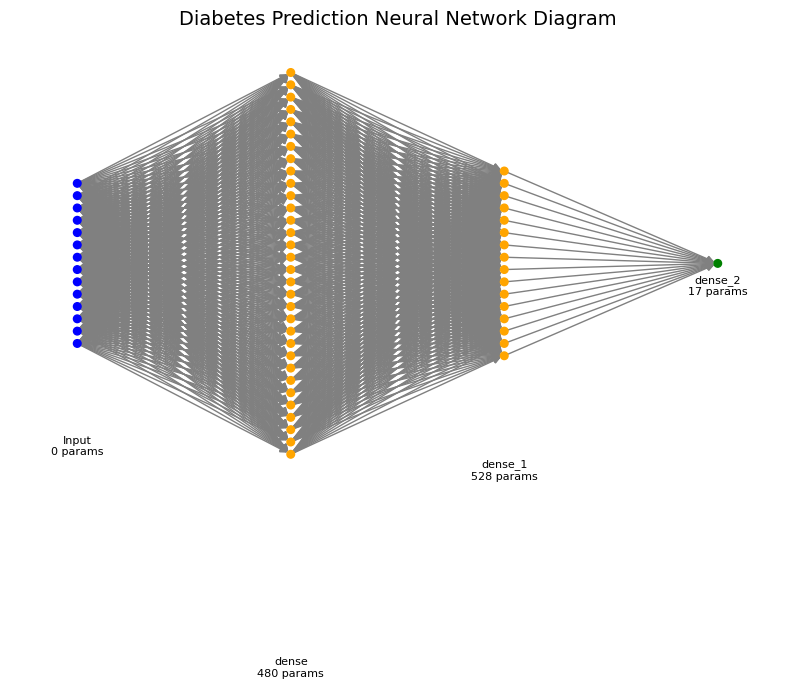

In [ ]:
# @title
# Reimport necessary libraries after code execution state reset
import matplotlib.pyplot as plt
import networkx as nx

def draw_model_diagram(ax, layers, layer_names, layer_params, colors):
    """
    Draws a neural network diagram corresponding to the provided model summary.

    Args:
    ax: matplotlib axis to draw on.
    layers: List of integers representing the number of nodes in each layer.
    layer_names: List of strings representing layer names.
    layer_params: List of integers representing parameter counts for each layer.
    colors: List of colors for each layer.
    """
    G = nx.DiGraph()
    pos = {}
    node_sizes = []
    node_colors = []
    x_offset = 0

    for layer_idx, (layer_nodes, layer_name, params) in enumerate(zip(layers, layer_names, layer_params)):
        y_offset = -(layer_nodes - 1) / 2
        for node_idx in range(layer_nodes):
            node_id = f"L{layer_idx}_N{node_idx}"
            pos[node_id] = (x_offset, y_offset + node_idx)
            G.add_node(node_id)
            node_sizes.append(30)
            node_colors.append(colors[layer_idx])
        if layer_idx > 0:
            for prev_node_idx in range(layers[layer_idx - 1]):
                prev_node_id = f"L{layer_idx-1}_N{prev_node_idx}"
                for curr_node_idx in range(layer_nodes):
                    curr_node_id = f"L{layer_idx}_N{curr_node_idx}"
                    G.add_edge(prev_node_id, curr_node_id)
        # Annotate layer name and parameter count
        ax.text(x_offset, -layer_nodes - 1.5, f"{layer_name}\n{params} params", ha="center", fontsize=8)
        x_offset += 1

    nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, with_labels=False, edge_color="gray")
    ax.axis("off")


# Add an input layer with 14 variables to the neural network diagram.

fig, ax = plt.subplots(figsize=(10, 6))

# Updated parameters with an input layer
layers = [14, 32, 16, 1]
layer_names = ["Input", "dense", "dense_1", "dense_2"]
layer_params = [0, 480, 528, 17]  # Input layer has no parameters
colors = ["blue", "orange", "orange", "green"]

draw_model_diagram(ax, layers, layer_names, layer_params, colors)
ax.set_title("Diabetes Prediction Neural Network Diagram", fontsize=14)
plt.show()



In our network above, the 14 inputs from our dataset are blue, the hidden layer neurons are both yellow and the output is green. All that grey shows all the connections between layers!

---

### **We are ready to train our model!**
Like activation functions, there are several ways to train and evaluate our model. Choosing the right approach depends on our data, goals, and computational resources. Let's explore three options here:

---

### **1. Simple Train-Validation Split**
- **How it works**:
  - Split the dataset into two parts: training (e.g., 80%) and validation (20%).
  - The model learns patterns from the training data over multiple **epochs** (complete passes through the training data) and is tested on the validation set after each epoch to monitor progress.

- **Why use it?**
  - It's simple and quick to implement.
  - Provides a clear separation between the data used for training and evaluation.

- **Limitations**:
  - Performance might vary depending on how the data is split—some splits may be better than others.
  - Risk of overfitting to the training set or underfitting the validation set.

- **Best for**:
  - Quick tests when time or computational resources are limited.
  - Datasets with a large number of samples, where splitting the data doesn't lead to a loss of valuable information.

---

### **2. K-Fold Cross-Validation**
- **How it works**:
  - Split the data into `k` equal parts (folds). Train the model `k` times, each time using a different fold for validation and the rest for training.

- **Why use it?**
  - Ensures that every data point gets a chance to be in the validation set exactly once.
  - Reduces variability caused by a single random split, leading to a more reliable estimate of the model’s performance.

- **Limitations**:
  - Computationally expensive, as the model is trained `k` times.
  - May not always be suitable for very large datasets or time-sensitive applications.

- **Best for**:
  - Medium-sized datasets when accuracy matters more than speed.

---

### **3. Stratified K-Fold Cross-Validation**
- **How it works**:
  - Like regular K-Fold, but makes sure each fold keeps the same proportion of labels.
  - For example, if 30% of the dataset is labeled as "positive" and 70% as "negative," each fold will maintain this 30:70 ratio.

- **Why use it?**
  - Ensures fairness when classes are imbalanced—important when, say, only 15% of patients have diabetes.

- **Limitations**:
  - Computationally expensive, like regular K-Fold Cross-Validation.
  - The added complexity of stratification may not be necessary for balanced datasets.

- **Best for**:
  - Datasets with imbalanced classes, where preserving the class distribution during training and validation is critical.

---

### **Choosing the Right Approach**
- Our dataset is small enought (390 rows and 14 columns) that we can try them all! (Larger datasets can take a long time.)
- In general, for **reliable and robust evaluation**, especially with smaller datasets, use **K-Fold Cross-Validation**.
- When working with **imbalanced data**, opt for **Stratified K-Fold Cross-Validation** to account for class distribution. If we had to guess - this will be best since we have many more non-diabetes patients than diabetes patients.

Youll be prompted to choose a method! Give them all a try!

And, one more note - for each method, many models are created and tested sometimes reaching over-fitting - where it just memorizes data. We added code to select the very best model before any obvious over-fitting, so it will look like it processes a final model once more at the end. That is when the ideal model from the approach chosen is finalized.

Run this next cell to be prompted to choose a training method. (You may have to click that "play" icon twice.) Once you select a method, be patient since it will take a minute or so!




In [ ]:
# @title
# Load and preprocess data
X = diabetes_data.drop(columns=['Diabetes']).values  # Features
y = diabetes_data['Diabetes'].values  # Target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# User selection for training method
print("Choose a training approach:")
print("1: Simple Train-Validation Split")
print("2: K-Fold Cross-Validation")
print("3: Stratified K-Fold Cross-Validation")
choice = int(input("Enter choice (1/2/3): "))

# Variables for logging accuracies
val_acc = []
train_acc = []
optimal_epoch = 0

if choice == 1:
    # Simple Train-Validation Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train the model
    model = create_model(input_shape=X_train.shape[1])
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=50, batch_size=32, verbose=1)

    # Log training/validation metrics
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Find optimal epoch
    optimal_epoch = np.argmax(val_acc) + 1
    print(f"Optimal number of epochs: {optimal_epoch}")

elif choice == 2:
    # K-Fold Cross-Validation
    from sklearn.model_selection import KFold
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_no = 1
    all_fold_val_acc = []

    for train_idx, val_idx in kfold.split(X_scaled):
        X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        # Train the model
        model = create_model(input_shape=X_train_fold.shape[1])
        history = model.fit(X_train_fold, y_train_fold,
                            validation_data=(X_val_fold, y_val_fold),
                            epochs=50, batch_size=32, verbose=0)

        # Log validation accuracies for fold
        fold_val_acc = history.history['val_accuracy']
        all_fold_val_acc.append(fold_val_acc)

        print(f"Fold {fold_no} Complete")
        fold_no += 1

    # Aggregate validation accuracies across folds to determine optimal epoch
    mean_val_acc = np.mean(all_fold_val_acc, axis=0)
    optimal_epoch = np.argmax(mean_val_acc) + 1
    print(f"Optimal number of epochs based on mean validation accuracy: {optimal_epoch}")

elif choice == 3:
    # Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_no = 1
    all_fold_val_acc = []

    for train_idx, val_idx in skf.split(X_scaled, y):
        X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        # Train the model
        model = create_model(input_shape=X_train_fold.shape[1])
        history = model.fit(X_train_fold, y_train_fold,
                            validation_data=(X_val_fold, y_val_fold),
                            epochs=50, batch_size=32, verbose=0)

        # Log validation accuracies for fold
        fold_val_acc = history.history['val_accuracy']
        all_fold_val_acc.append(fold_val_acc)

        print(f"Fold {fold_no} Complete")
        fold_no += 1

    # Aggregate validation accuracies across folds to determine optimal epoch
    mean_val_acc = np.mean(all_fold_val_acc, axis=0)
    optimal_epoch = np.argmax(mean_val_acc) + 1
    print(f"Optimal number of epochs based on mean validation accuracy: {optimal_epoch}")

else:
    print("Invalid choice. Please run the program again and choose 1, 2, or 3.")

# Step 4: Retrain Final Model Using Optimal Epoch
print("\nRetraining final model using optimal number of epochs...")

# Reserve a portion of the data for validation
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Retrain the model using the optimal number of epochs
final_model = create_model(input_shape=X_train_final.shape[1])
final_history = final_model.fit(
    X_train_final, y_train_final,
    validation_data=(X_val_final, y_val_final),  # Provide validation data
    epochs=optimal_epoch, batch_size=32, verbose=1
)

# Save the final model
final_model.save("final_model.keras")
print(f"Final model trained with {optimal_epoch} epochs and saved as 'final_model.keras'")


Choose a training approach:
1: Simple Train-Validation Split
2: K-Fold Cross-Validation
3: Stratified K-Fold Cross-Validation
Enter choice (1/2/3): 3
Fold 1 Complete
Fold 2 Complete
Fold 3 Complete
Fold 4 Complete
Fold 5 Complete
Optimal number of epochs based on mean validation accuracy: 46

Retraining final model using optimal number of epochs...
Epoch 1/46
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4793 - loss: 0.7780 - val_accuracy: 0.5641 - val_loss: 0.7129
Epoch 2/46
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5642 - loss: 0.7905 - val_accuracy: 0.7821 - val_loss: 0.6737
Epoch 3/46
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6754 - loss: 0.7073 - val_accuracy: 0.8462 - val_loss: 0.6392
Epoch 4/46
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7117 - loss: 0.6505 - val_accuracy: 0.8462 - val_loss: 0.6075
Epoch 5/46
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7023 - loss: 0.6479 - val_accuracy: 0.8462 - val_loss: 0.5797
Epoch 6/46
10/10 ━

OK! Our model is trained! Let's see what happened. The code below will show us how well the model learned after each epoch. And how well the model at that point performed with the validation test set!


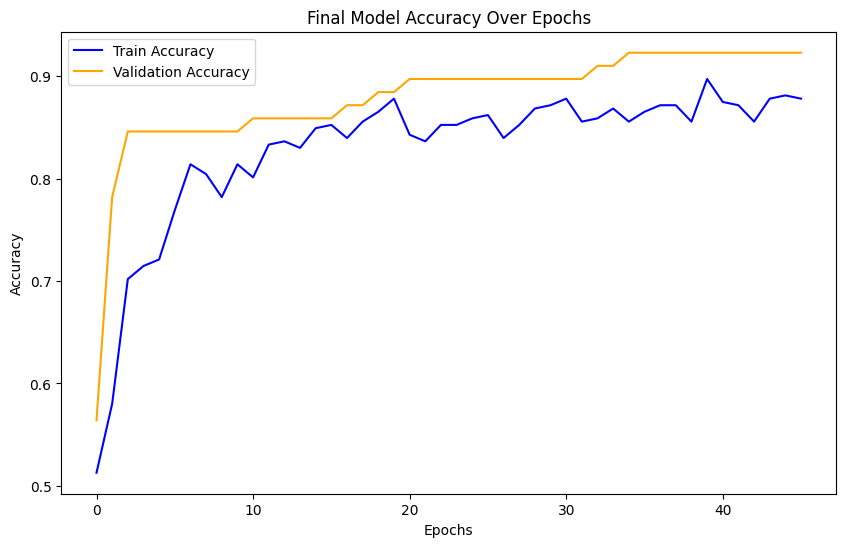

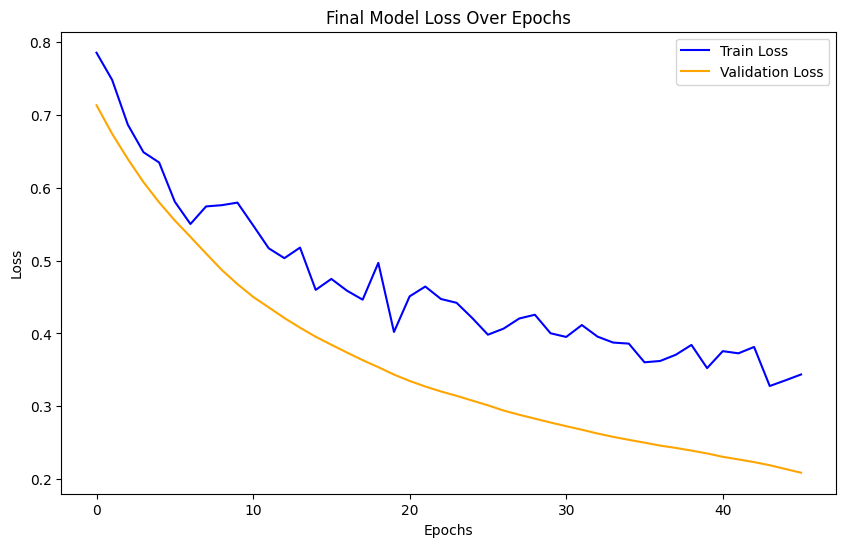

In [ ]:
# Visualize final training history - Accuracy
plt.figure(figsize=(10, 6))
plt.plot(final_history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(final_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Final Model Accuracy Over Epochs')
plt.legend()
plt.show()

# Visualize final training history - Loss
plt.figure(figsize=(10, 6))
plt.plot(final_history.history['loss'], label='Train Loss', color='blue')
plt.plot(final_history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Final Model Loss Over Epochs')
plt.legend()
plt.show()


Our model looks pretty good! Specifically:

### **Training Accuracy Observations**
1. **Accuracy Increase Over Epochs:**
   - The training accuracy (blue line) steadily increases, indicating that our model is learning from the training data.
   - The validation accuracy (orange line) also improves and stabilizes, showing that our model is generalizing well to unseen data.

2. **Validation Accuracy is Higher than Training Accuracy:**
   - This might be due to the dropout neuron regularization technique we included causing the model to perform better on the validation set (using all neurons) than on the training set.
   - It could also be due to random effects from a well-designed validation set.

3. **Convergence:**
   - Both training and validation accuracy appear to stabilize around epoch 35-40, suggesting that the model has learned most of the patterns in the data and further training might not significantly improve performance.

4. **No Overfitting:**
   - Overfitting is indicated when the validation accuracy decreases while the training accuracy continues to increase. This plot shows no significant signs of overfitting since validation accuracy remains stable and high.


#### **Loss History Observations**:
1. **Train Loss** (blue line):
   - The training loss (how "off" our predictions are) steadily decreases over epochs, indicating that our model is optimizing well on the training data.

2. **Validation Loss** (orange line):
   - The validation loss also decreases and closely tracks the training loss. This is a good sign that our model is generalizing well to unseen data without overfitting.

3. **Convergence**:
   - By around epoch 20–30, both the training and validation losses stabilize, suggesting that our model has reached an optimal level of learning. Further training might not result in significant improvements.

4. **No Overfitting**:
   - Overfitting again is typically indicated by a divergence between validation loss and training loss (e.g., validation loss increasing while training loss continues to decrease). This plot shows no such divergence, meaning our model is well-regularized and performs well on unseen data.

#### **Conclusion**:
Our model is well-trained and balanced, with no significant signs of overfitting or underfitting.



OK - we’ve got a model! But how do we decide when to say “this person likely has diabetes”?
Our model gives probabilities. Should we classify someone as diabetic if their probability is 0.30? 0.80?

To find the best decision threshold, we plotted the ROC Curve (Receiver Operating Characteristic). It shows the trade-off between sensitivity (true positive rate) and 1 - specificity (false positive rate). From this, we use Youden’s Index to find the best threshold, which turned out to be 0.31.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
AUROC: 0.99


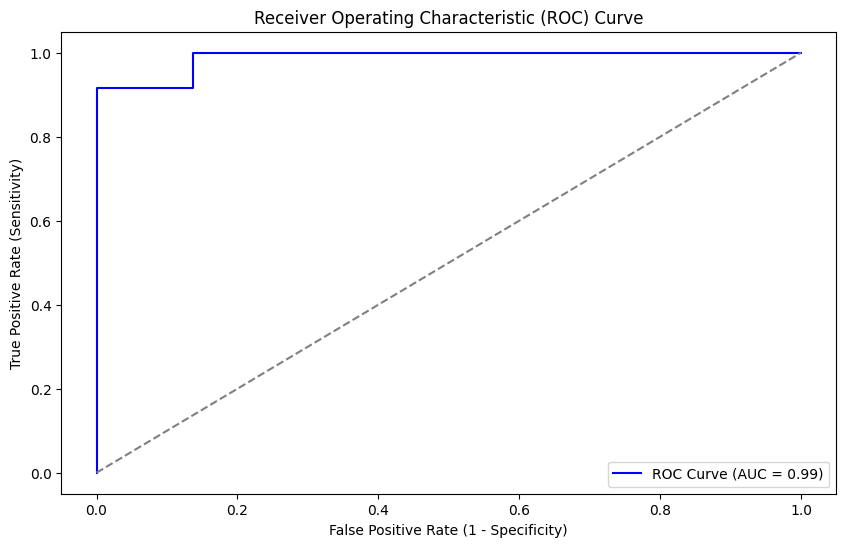

Optimal Threshold (Youden's Index): 0.31


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities for the validation set
y_probs = final_model.predict(X_val_final).ravel()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val_final, y_probs)

# Calculate AUROC
roc_auc = auc(fpr, tpr)
print(f"AUROC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Find the optimal threshold (maximizing Youden's Index)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold (Youden's Index): {optimal_threshold:.2f}")


Since our dataset is imbalanced (more non-diabetic patients), the ROC curve isn’t the full story.
The Precision-Recall (PR) Curve is better in this case. It shows how well the model identifies positive cases (diabetes) while minimizing false alarms. This helps fine-tune the threshold even further based on what matters most—catching every diabetic patient, or avoiding false positives.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Average Precision (AP): 0.96


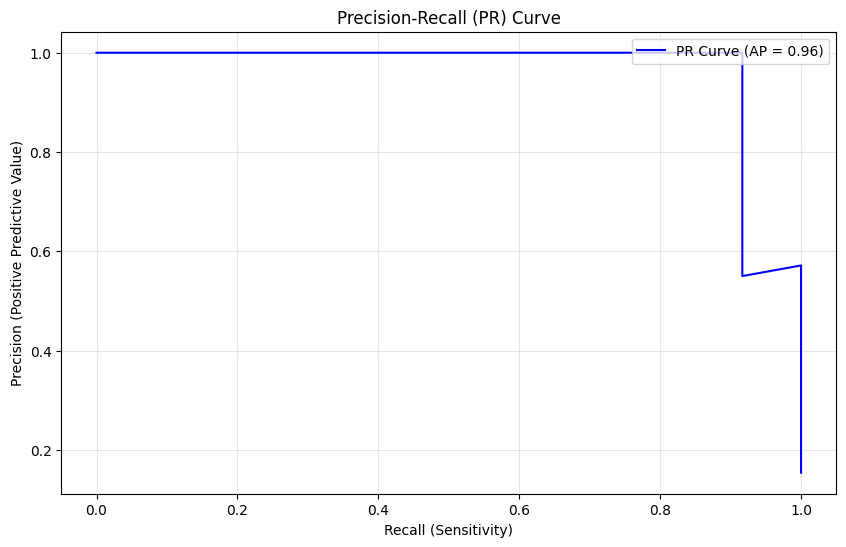

Optimal Threshold (F1 Score): 0.31
Maximum F1 Score: 0.96


In [ ]:
# @title
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities for the validation set
y_probs = final_model.predict(X_val_final).ravel()

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_val_final, y_probs)

# Calculate Average Precision (AP)
average_precision = average_precision_score(y_val_final, y_probs)
print(f"Average Precision (AP): {average_precision:.2f}")

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', label=f"PR Curve (AP = {average_precision:.2f})")
plt.xlabel("Recall (Sensitivity)")
plt.ylabel("Precision (Positive Predictive Value)")
plt.title("Precision-Recall (PR) Curve")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.show()

# Find the threshold that maximizes the F1 Score
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold_pr = thresholds[optimal_idx]
print(f"Optimal Threshold (F1 Score): {optimal_threshold_pr:.2f}")
print(f"Maximum F1 Score: {f1_scores[optimal_idx]:.2f}")


Now, let's view a confusion matrix to see how our final model performs with different thresholds and the ideal one we found above!


Evaluating with different thresholds:
Confusion Matrix (Threshold = 0.3):
[[66  0]
 [ 1 11]]


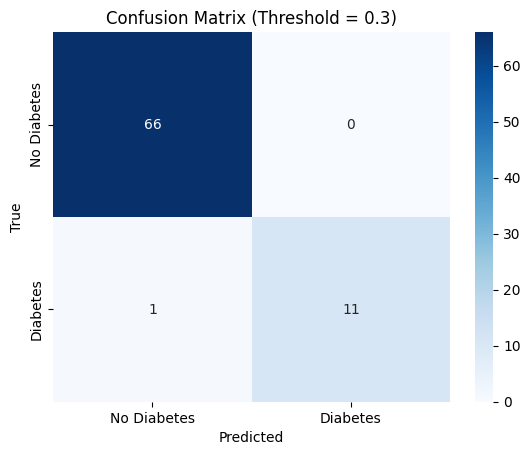

Classification Report (Threshold = 0.3):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        66
           1       1.00      0.92      0.96        12

    accuracy                           0.99        78
   macro avg       0.99      0.96      0.97        78
weighted avg       0.99      0.99      0.99        78

Confusion Matrix (Threshold = 0.5):
[[66  0]
 [ 6  6]]


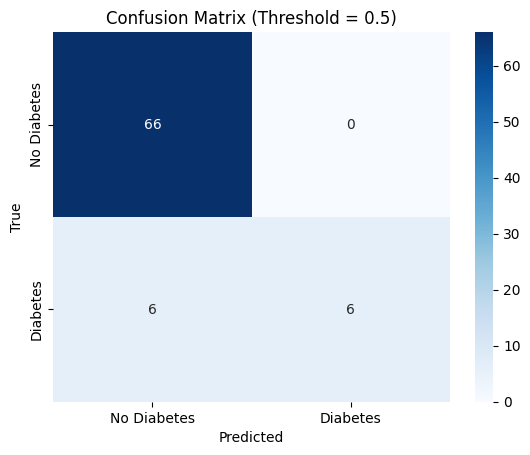

Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        66
           1       1.00      0.50      0.67        12

    accuracy                           0.92        78
   macro avg       0.96      0.75      0.81        78
weighted avg       0.93      0.92      0.91        78

Confusion Matrix (Threshold = 0.3082324266433716):
[[66  0]
 [ 2 10]]


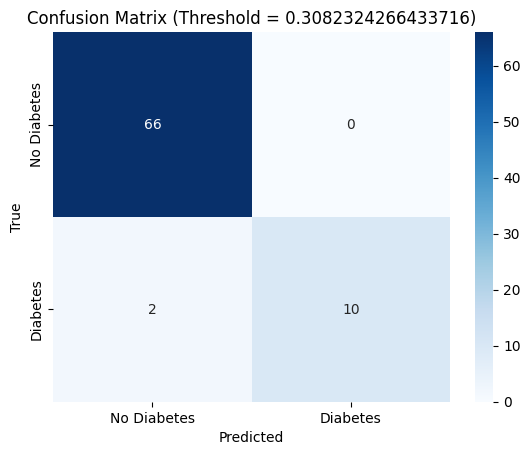

Classification Report (Threshold = 0.3082324266433716):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        66
           1       1.00      0.83      0.91        12

    accuracy                           0.97        78
   macro avg       0.99      0.92      0.95        78
weighted avg       0.98      0.97      0.97        78

Confusion Matrix (Threshold = 0.7):
[[66  0]
 [ 8  4]]


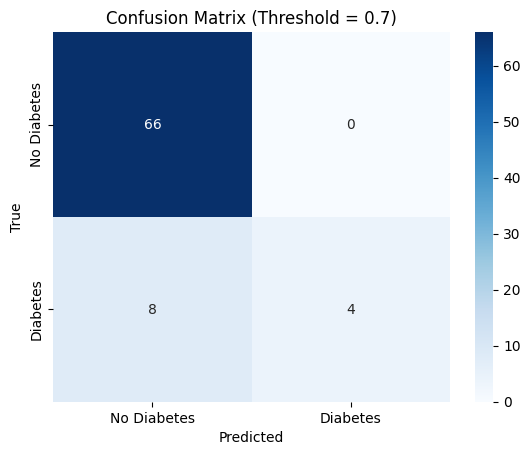

Classification Report (Threshold = 0.7):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        66
           1       1.00      0.33      0.50        12

    accuracy                           0.90        78
   macro avg       0.95      0.67      0.72        78
weighted avg       0.91      0.90      0.87        78



In [ ]:
# @title
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate confusion matrix and classification report for a given threshold
def evaluate_threshold(threshold):
    # Adjust predictions based on the threshold
    y_pred_threshold = (y_probs > threshold).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(y_val_final, y_pred_threshold)

    # Print confusion matrix and classification report
    print(f"Confusion Matrix (Threshold = {threshold}):")
    print(cm)

    # Visualize confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Threshold = {threshold})')
    plt.show()

    print(f"Classification Report (Threshold = {threshold}):")
    print(classification_report(y_val_final, y_pred_threshold))

# Test with different thresholds, including the optimal threshold
thresholds = [0.3, 0.5, optimal_threshold, 0.7]
print("\nEvaluating with different thresholds:")
for t in thresholds:
    evaluate_threshold(t)


Congratulations! You created a neural network, trained a model to predict diabetes and assessed different thresholds to determine the impact on diabetes detection! Once you have a model, though, you might want to save it and post it to a website for users to access! In the code above, we already took care of it. You can see this file and the pre-processing file if you click the folder icon on the left side of the window. Your personally generated neural network model, after all your hard work above, is available to you:

```
final_model.keras
```





You may download it to your local machine for future use by hovering over the file name, and then clicking the three dots to reveal the download option!

And, here is how you could then load your model:



```
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('path/to/your_model.keras')

```



Wait - can't I run my model? That is, enter values and see the predictions? Is a web app possible?

Yes!! I've created a web app that allows a user to upload a neural network model and the pre-processing steps! Go [here](https://run-nn.streamlit.app) to run your freshly created neural network and enter values!

And, if you only chose one training method above, remember to try the others, too, by re-running that scell and selecting another training mehod!



## Reflection

In this Colab notebook you have explored the foundational concepts of deep learning and neural networks. By integrating these concepts with real-world medical data, you should now:

1. Understand the basic architecture of neural networks and how they learn from data.
2. Recognize the significance of activation functions, optimization algorithms, and loss functions in training neural networks.
3. Appreciate the potential of deep learning in analyzing complex medical data, such as imaging or genomic data.
4. Gain practical insights into implementing and evaluating neural networks using Python and TensorFlow.

This knowledge empowers you to critically assess and potentially contribute to innovations in healthcare AI, enhancing patient care through data-driven insights. Feel free to reach out! DL
